## Comparing experiments

This norebook is used to compare the results accross experiments containing different candiate algorithms

In [15]:
import pickle
import numpy as np
import pandas as pd
import os

from nsga_population import *
from typing import List
from individual import Individual

import matplotlib.pyplot as plt
import seaborn as sns

log_base = "..\\..\\logdata\\"
base_folder_name = "Experiment_1_2024-10-15_"
#method_names = ["base", "classical", "qpe_restricted", "qpe"]
method_names = ["classical_p_150", "classical_p_200", "classical_p_250", "qpe_p_150", "qpe_p_200", "qpe_p_250"]
experiment_folders = [base_folder_name + f for f in method_names]

Obtaining the filenames of the log files in the current experiment

In [16]:
df_list = []
for experiment_folder in experiment_folders:
    cur_experiment_path = os.path.join(log_base, experiment_folder)
    filenames = os.listdir(cur_experiment_path)
    for f_name in filenames:
        if f_name[-4:] == ".csv":
            # identify the csv files
            cur_csv_path = os.path.join(os.path.join(log_base, experiment_folder), f_name)
            test_df = pd.read_csv(cur_csv_path, index_col=False)
            result_df = test_df[test_df["Iteration"] == test_df["Iteration"].max()].reset_index(drop=True)
            result_df = result_df[result_df["Problem"].isin(["ft06", "ft10", "ft20"])]
            # Add column
            result_df["Experiment"] = pd.Series([experiment_folder for i in range(result_df.shape[0])])
            df_list.append(result_df)

comp_df = pd.concat(df_list)        

In [17]:
plot_df = comp_df.groupby(["Problem", "Candidate"]).agg({col_name : {"mean", "std"} for col_name in comp_df.columns[5:-1]})
plot_df

Min Makespan            Max Makespan  \
                                          mean        std         mean   
Problem Candidate                                                        
ft20    classical                  1328.000000  17.681083  1377.733333   
        quantum_position_encoding  1269.466667   8.381973  1352.266667   

                                             Avg Makespan             \
                                         std         mean        std   
Problem Candidate                                                      
ft20    classical                  42.650895  1351.607778  25.006539   
        quantum_position_encoding  50.826909  1302.744550  15.845393   

                                  Min Mean Flow Time             \
                                                mean        std   
Problem Candidate                                                 
ft20    classical                         932.836667  19.726806   
        quantum_position_encoding         874.246667  13.077639   

                                  Max Mean Flow Time             \
                                                mean        std   
Problem Candidate                                                 
ft20    classical                        1377.733333  42.650895   
        quantum_position_encoding        1352.266667  50.826909   

                                  Avg Mean Flow Time               Spread  \
                                                mean        std      mean   
Problem Candidate                                                           
ft20    classical                         954.386139  23.595240       inf   
        quantum_position_encoding         903.270698  13.241959  1.014194   

                                              N Fronts            \
                                        std       mean       std   
Problem Candidate                                                  
ft20    classical                       NaN  23.800000  3.726883   
        quantum_position_encoding  0.530528  27.633333  3.221515   

                                  N Non-dominated solutions            
                                                       mean       std  
Problem Candidate                                                      
ft20    classical                                  3.233333  1.590561  
        quantum_position_encoding                  5.033333  2.025413

In [18]:
plot_df.to_csv(base_folder_name + "main_comparison.csv")

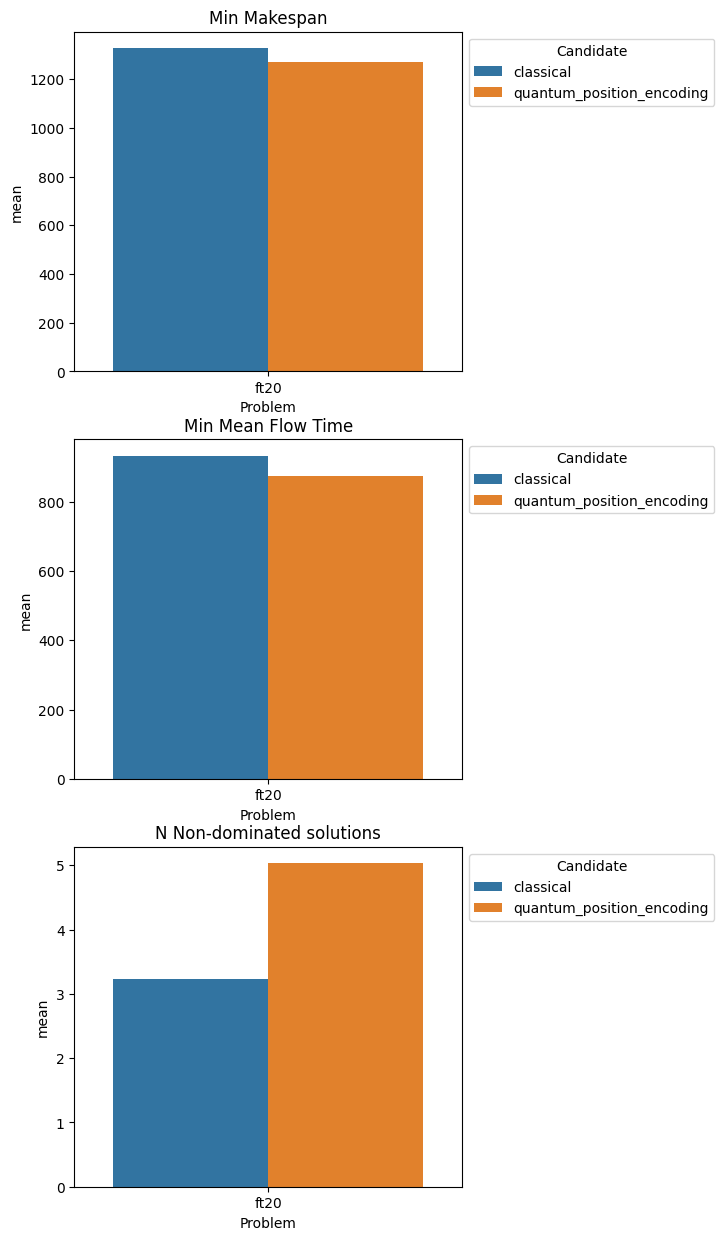

In [19]:
fig, ax = plt.subplots(3, 1, figsize=(5, 15))
ax[0].set_title("Min Makespan")
ax[1].set_title("Min Mean Flow Time")
ax[2].set_title("N Non-dominated solutions")

sns_ax_1 = sns.barplot(data=plot_df["Min Makespan"], x="Problem", y="mean", hue="Candidate", ax=ax[0])
sns.move_legend(sns_ax_1, "upper left", bbox_to_anchor=(1, 1))

sns_ax_2 = sns.barplot(data=plot_df["Min Mean Flow Time"], x="Problem", y="mean", hue="Candidate", ax=ax[1])
sns.move_legend(sns_ax_2, "upper left", bbox_to_anchor=(1, 1))

sns_ax_3 = sns.barplot(data=plot_df["N Non-dominated solutions"], x="Problem", y="mean", hue="Candidate", ax=ax[2])
sns.move_legend(sns_ax_3, "upper left", bbox_to_anchor=(1, 1))

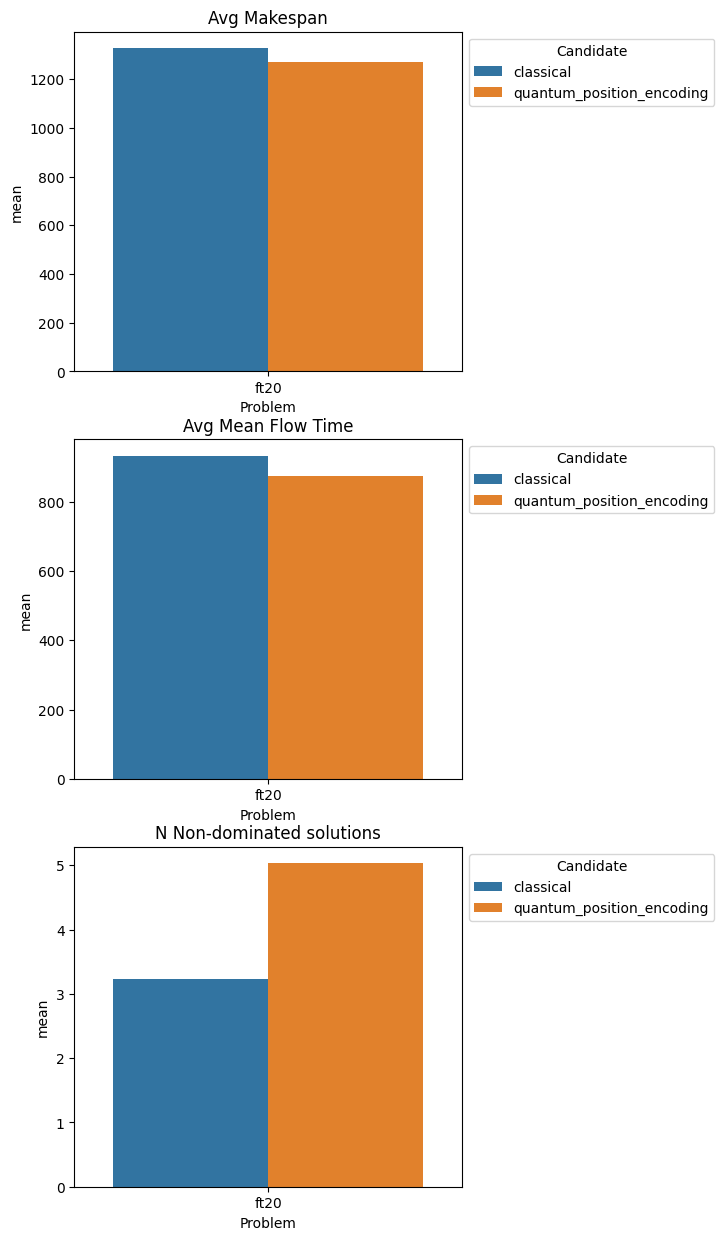

In [20]:
fig, ax = plt.subplots(3, 1, figsize=(5, 15))
ax[0].set_title("Avg Makespan")
ax[1].set_title("Avg Mean Flow Time")
ax[2].set_title("N Non-dominated solutions")

sns_ax_1 = sns.barplot(data=plot_df["Min Makespan"], x="Problem", y="mean", hue="Candidate", ax=ax[0])
sns.move_legend(sns_ax_1, "upper left", bbox_to_anchor=(1, 1))

sns_ax_2 = sns.barplot(data=plot_df["Min Mean Flow Time"], x="Problem", y="mean", hue="Candidate", ax=ax[1])
sns.move_legend(sns_ax_2, "upper left", bbox_to_anchor=(1, 1))

sns_ax_3 = sns.barplot(data=plot_df["N Non-dominated solutions"], x="Problem", y="mean", hue="Candidate", ax=ax[2])
sns.move_legend(sns_ax_3, "upper left", bbox_to_anchor=(1, 1))